In [1]:
sample_type = 'MC'
branch = 'm_Kpipi'

In [2]:
import sys
sys.path.insert(0, '..')
from definition import (
    data_names,
    columns,
    MC_description
)

MC_name = data_names[sample_type]
print("data sample name: ", MC_name)

data sample name:  BTODstDX_MC


The columns that need to be looked at are:
- $q^2$: `q2_reco`
- *isolation BDT*: `isolation_bdt`
- $t_\tau$: `tau_life_reco`
- $m(D^*K\pi\pi)$: `m_DstKpipi`
- The angles 
    - $\theta_X$ ($=\theta_D$ of the paper?): `theta_X_reco`
    - $\theta_L$: `theta_L_reco`
    - $\chi$: `chi_reco`

# MC sample of $B \to D^{*-}\left(D^{+} \to K^+ \pi^+ \pi^+  \right)X$ Background

A fit to the $m(K\pi\pi)$ invariant mass in `MC` is performed in order to get the shape of the $D^+$ peak.\
This is used to fix the tail parameters of the `data` sample.

**Model**: The $D^+$ peak in $m(K\pi\pi)$ is modeled by the sum of two CB PDFs with tails in opposite sides and shared $\mu$ and $\sigma$

In [3]:
# python libraries
import zfit
import timeit

# bd2dsttaunu
from bd2dsttaunu.locations import loc
from bd2dsttaunu.definition import m_B0_PDG, m_B0s_PDG

# HEA library
from HEA.plot import plot_hist_auto, plot_hist, save_fig
from HEA import load_dataframe
from HEA.plot.tools import draw_vline
from HEA.definition import latex_params

Welcome to JupyROOT 6.22/06


## Read the dataframe

In [4]:
df = load_dataframe(loc.B2DstDplusX_MC, tree_name='DecayTreeTuple/DecayTree', columns=columns)

Loading /data/lhcb/users/scantlebury-smead/angular_analysis/double_charm/final_ds_selection_B_DstDpX_Kpipi_truth_matched.root


## Plot

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/m_Kpipi
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/q2_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/isolation_bdt
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/tau_life_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/m_DstKpipi
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/theta_X_reco


/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/theta_L_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/chi_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/costheta_X_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/costheta_L_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/coschi_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/tau_M
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/B0_M


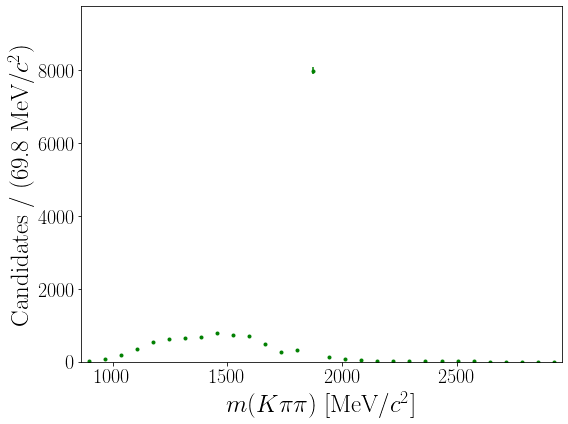

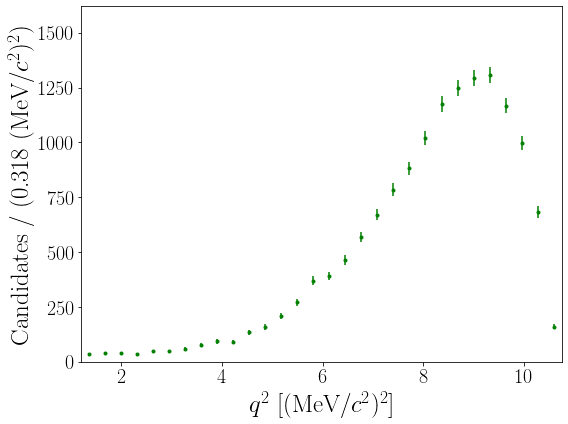

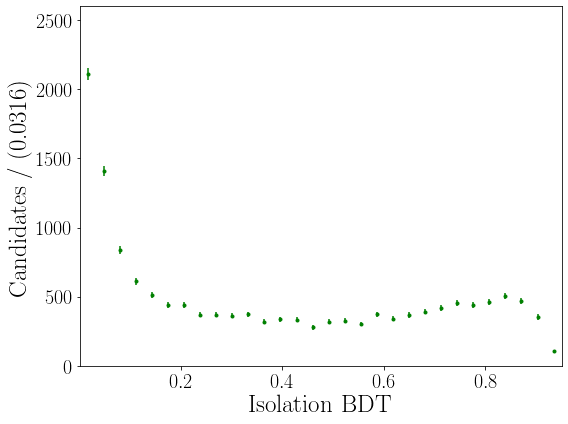

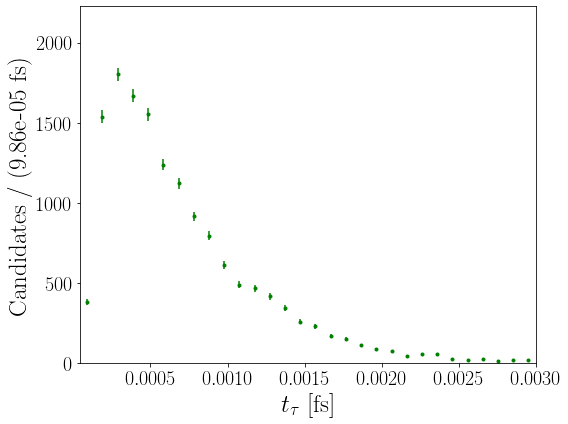

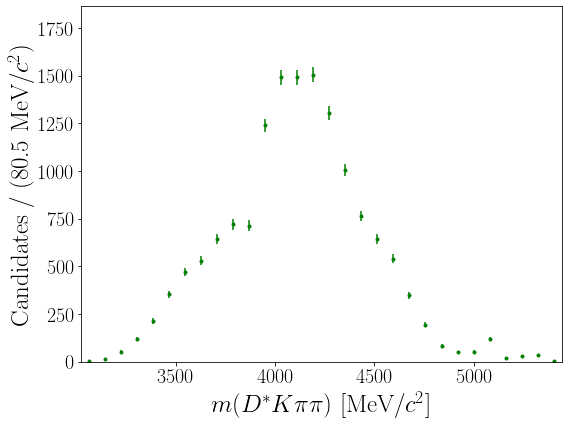

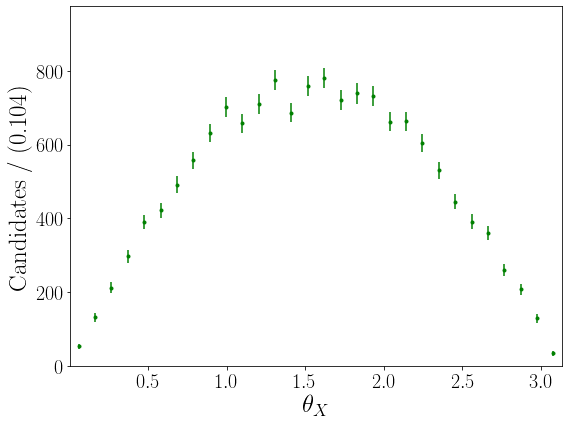

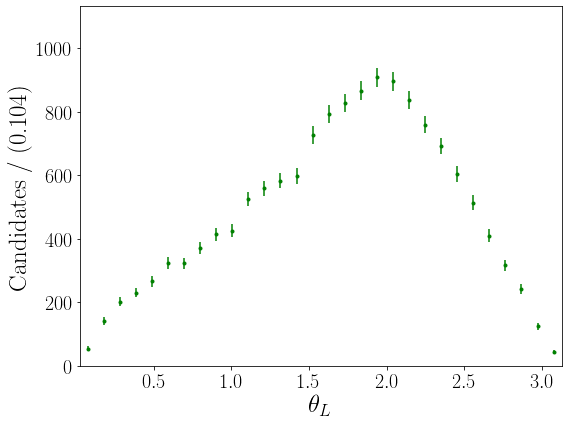

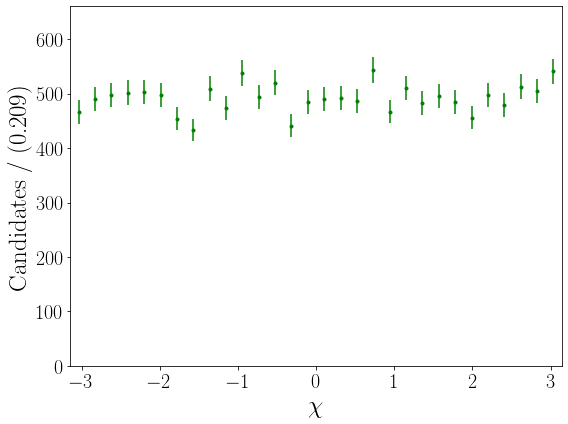

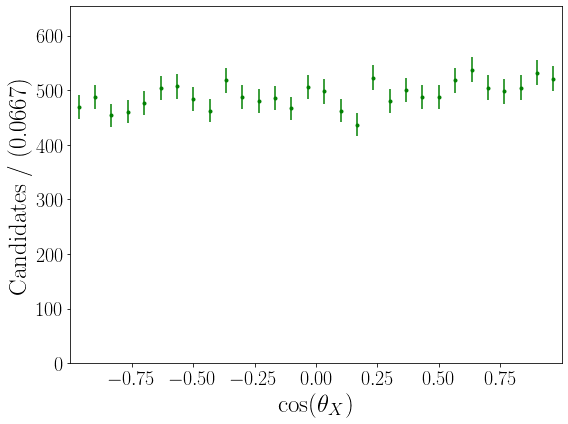

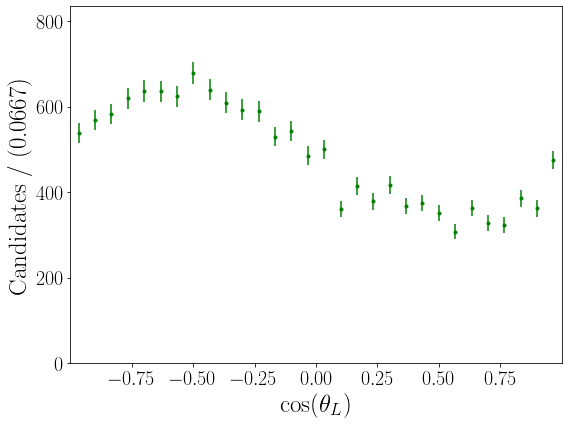

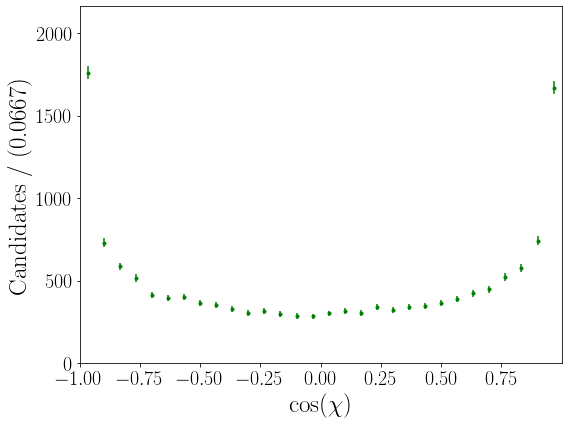

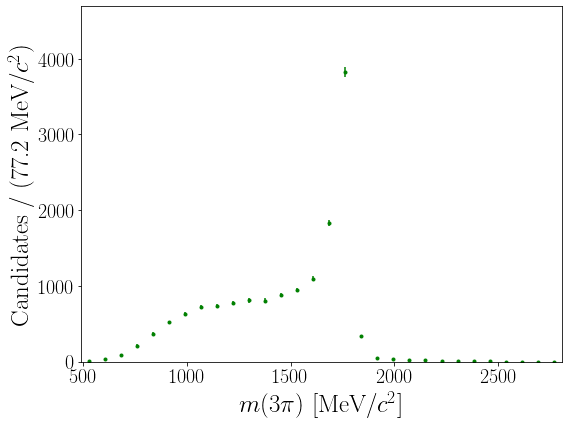

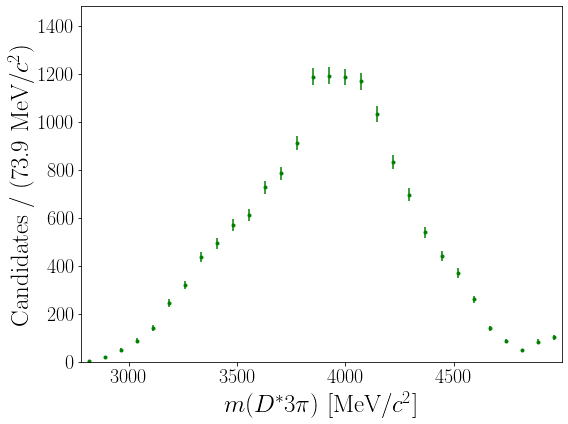

In [6]:
column_ranges = {
    'q2_reco': [1.2, None],
    'isolation_bdt': [None, 0.95],
    'tau_life_reco': [None, 0.003]
}

for column in columns:
    
    if column in column_ranges:
        low, high = column_ranges[column]
    else:
        low = None
        high = None
        
    fig, ax = plot_hist_auto({MC_name: df}, column, fig_name=column,
                             folder_name=MC_name, bar_mode=False, 
                             low=low, high=high, n_bins=30,
                             colors='g')

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC/m_DstKpipi


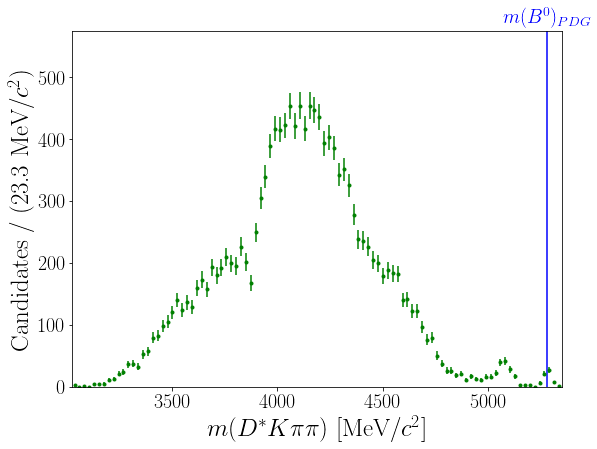

In [7]:
fig, ax = plot_hist_auto({MC_name: df}, 'm_DstKpipi', fig_name=column,
                             folder_name=MC_name, bar_mode=False, high=5350,
                             colors='g', save_fig=False)

# low_m_DstKpipi, high_m_DstKpipi = ax.get_xlim()

# ax.axvline(m_B0_PDG, color='b')
# ax.text((m_B0_PDG - low_m_DstKpipi) / (high_m_DstKpipi - low_m_DstKpipi), 1.01, '$m(B^0)_{PDG}$',
#         verticalalignment='bottom', horizontalalignment='center',
#         transform=ax.transAxes,
#         color='b', fontsize=20)

draw_vline(ax, m_B0_PDG, '$m(B^0)_{PDG}$')
# draw_vline(ax, m_B0s_PDG, '$m(B^0_s)_{PDG}$')


save_fig(fig, 'm_DstKpipi', folder_name=MC_name)